In [3]:
#time-freq plots of epochs used for meg
import mne
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
high_epochs_files = {#"patient_03" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_Epochs/Patient3_part1_high_SWR_epochs.fi",
            "patient_05_part1L" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1L_high_SWR_epochs.fif" ,
            "patient_05_part1R" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1R_high_SWR_epochs.fif" ,
            "patient_05_part2L" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2L_high_SWR_epochs.fif" ,
            "patient_05_part2R" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2R_high_SWR_epochs.fif" ,
            "patient_06" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient6_high_SWR_epochs.fif",
            "patient_08" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient8_high_SWR_epochs.fif",
            #"patient_09" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_Epochs/Patient9_high_SWR_epochs.fif",
            "patient_10" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient10_high_SWR_epochs.fif",
            "patient_11_part1" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part1_high_SWR_epochs.fif",
            "patient_11_part2" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part2_high_SWR_epochs.fif",
            "patient_13" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient13_high_SWR_epochs.fif",
            "patient_14_part1_left" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_left_high_SWR_epochs.fif",
            "patient_14_part2_left" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part2_left_high_SWR_epochs.fif",
            "patient_14_part1_right" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_right_high_SWR_epochs.fif",
            "patient_14_part2_right" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part2_right_high_SWR_epochs.fif",
            "patient_16" : '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient16_high_SWR_epochs.fif',
            "patient_17" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient17_high_SWR_epochs.fif",
            "patient_21" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient21_high_SWR_epochs.fif",
            "patient_22" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient22_high_SWR_epochs.fif",
            "patient_23" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient23_high_SWR_epochs.fif",
            "patient_25":  "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient25_high_SWR_epochs.fif"
            }

low_epochs_files = {#"patient_03" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_Epochs/Patient3_part1_low_SWR_epochs.fi",
            "patient_05_part1L" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1L_low_SWR_epochs.fif" ,
            "patient_05_part1R" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1R_low_SWR_epochs.fif" ,
            "patient_05_part2L" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2L_low_SWR_epochs.fif" ,
            "patient_05_part2R" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2R_low_SWR_epochs.fif" ,
            "patient_06" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient6_low_SWR_epochs.fif",
            "patient_08" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient8_low_SWR_epochs.fif",
            #"patient_09" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_Epochs/Patient9_low_SWR_epochs.fif",
            "patient_10" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient10_low_SWR_epochs.fif",
            "patient_11_part1" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part1_low_SWR_epochs.fif",
            "patient_11_part2" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part2_low_SWR_epochs.fif",
            "patient_13" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient13_low_SWR_epochs.fif",
            "patient_14_part1_left" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_left_low_SWR_epochs.fif",
            "patient_14_part2_left" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part2_left_low_SWR_epochs.fif",
            "patient_14_part1_right" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_right_low_SWR_epochs.fif",
            "patient_14_part2_right" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part2_right_low_SWR_epochs.fif",
            "patient_16" : '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient16_low_SWR_epochs.fif',
            "patient_17" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient17_low_SWR_epochs.fif",
            "patient_21" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient21_low_SWR_epochs.fif",
            "patient_22" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient22_low_SWR_epochs.fif",
            "patient_23" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient23_low_SWR_epochs.fif",
            "patient_25":  "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient25_low_SWR_epochs.fif"
            }

In [5]:
high_epochs_files_mag = {#"patient_03" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_Epochs/Patient3_part1_high_SWR_epochs.fi",
            "patient_05_part1L" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part1L_mag_high_SWR_epochs.fif" ,
            "patient_05_part1R" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part1R_mag_high_SWR_epochs.fif" ,
            "patient_05_part2L" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part2L_mag_high_SWR_epochs.fif" ,
            "patient_05_part2R" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part2R_mag_high_SWR_epochs.fif" ,
            "patient_06" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient6_mag_high_SWR_epochs.fif",
            "patient_08" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient8_mag_high_SWR_epochs.fif",
            #"patient_09" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_Epochs/Patient9_high_SWR_epochs.fif",
            "patient_10" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient10_mag_high_SWR_epochs.fif",
            "patient_11_part1" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient11_part1_mag_high_SWR_epochs.fif",
            "patient_11_part2" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient11_part2_mag_high_SWR_epochs.fif",
            "patient_13" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient13_mag_high_SWR_epochs.fif",
            "patient_14_part1_left" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part1_left_mag_high_SWR_epochs.fif",
            "patient_14_part2_left" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part2_left_mag_high_SWR_epochs.fif",
            "patient_14_part1_right" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part1_right_mag_high_SWR_epochs.fif",
            "patient_14_part2_right" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part2_right_mag_high_SWR_epochs.fif",
            "patient_16" : '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient16_mag_high_SWR_epochs.fif',
            "patient_17" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient17_mag_high_SWR_epochs.fif",
            "patient_21" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient21_mag_high_SWR_epochs.fif",
            "patient_22" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient22_mag_high_SWR_epochs.fif",
            "patient_23" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient23_mag_high_SWR_epochs.fif",
            "patient_25":  "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient25_mag_high_SWR_epochs.fif"
            }

low_epochs_files_mag = {#"patient_03" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_Epochs/Patient3_part1_low_SWR_epochs.fi",
            "patient_05_part1L" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part1L__mag_low_SWR_epochs.fif" ,
            "patient_05_part1R" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part1R__mag_low_SWR_epochs.fif" ,
            "patient_05_part2L" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part2L__mag_low_SWR_epochs.fif" ,
            "patient_05_part2R" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part2R__mag_low_SWR_epochs.fif" ,
            "patient_06" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient6__mag_low_SWR_epochs.fif",
            "patient_08" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient8__mag_low_SWR_epochs.fif",
            #"patient_09" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_Epochs/Patient9_low_SWR_epochs.fif",
            "patient_10" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient10__mag_low_SWR_epochs.fif",
            "patient_11_part1" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient11_part1__mag_low_SWR_epochs.fif",
            "patient_11_part2" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient11_part2__mag_low_SWR_epochs.fif",
            "patient_13" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient13__mag_low_SWR_epochs.fif",
            "patient_14_part1_left" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part1_left__mag_low_SWR_epochs.fif",
            "patient_14_part2_left" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part2_left__mag_low_SWR_epochs.fif",
            "patient_14_part1_right" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part1_right__mag_low_SWR_epochs.fif",
            "patient_14_part2_right" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part2_right__mag_low_SWR_epochs.fif",
            "patient_16" : '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient16__mag_low_SWR_epochs.fif',
            "patient_17" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient17__mag_low_SWR_epochs.fif",
            "patient_21" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient21__mag_low_SWR_epochs.fif",
            "patient_22" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient22__mag_low_SWR_epochs.fif",
            "patient_23" : "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient23__mag_low_SWR_epochs.fif",
            "patient_25":  "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient25__mag_low_SWR_epochs.fif"}

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1L_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1R_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1L_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1R_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2L_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2R_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2L_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2R_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient6_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient8_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient6_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient8_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient10_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part1_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New co

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient10_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part1_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part2_high_SWR_epochs.fif) does not conform to MNE naming conven

Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient13_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_left_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. N

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient13_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_left_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part2_left_high_SWR_epochs.fif) does not conform to MNE nam

Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient16_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient17_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code sho

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient16_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient17_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient21_high_SWR_epochs.fif) does not conform to MNE naming conventions. All e

Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient22_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient23_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient22_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient23_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient25_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
20
No baseline correction applied


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/860661502.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient25_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


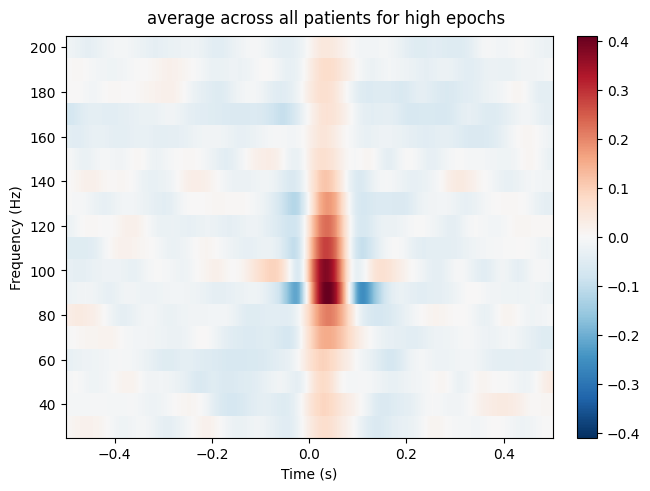

In [6]:
#see time-frequency plots
frequencies = np.arange(30, 201, 10)
n_cycles = frequencies / 5


baseline_powers = {}
for patient_id, epoch_file in high_epochs_files.items():
    epochs = mne.read_epochs(epoch_file, preload=True)
    power, itc = epochs.compute_tfr(
        method="morlet", 
        freqs=frequencies, 
        n_cycles=n_cycles, 
        decim=1, 
        return_itc=True,
        average=True
    )
    power.apply_baseline((-0.7, -0.5), mode = 'logratio' )

    #average across channels 
    avg_data = np.mean(power.data, axis=0, keepdims=True)  # shape: (1, freqs, times)
    power._data = avg_data
    power.pick_channels([power.ch_names[0]]) #drop the channels so only have one average one to match the dimensions
    baseline_powers[patient_id] = power


print(len(baseline_powers))


summed_power = None
for power in baseline_powers.values():
    if summed_power is None:
        summed_power = power
    else:
        summed_power = summed_power.__add__(power)

#averaga acorss patients??
summed_power._data /= len(baseline_powers)




fig = summed_power.plot(
    tmin = -0.5,
    tmax = 0.5,
    baseline = None,
    mode = 'mean',
    title = f'average across all patients for high epochs',
    show = True
)





Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1L_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1R_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1L_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1R_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2L_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2R_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2L_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2R_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient6_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient8_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient6_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient8_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient10_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part1_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient10_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part1_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part2_low_SWR_epochs.fif) does not conform to MNE naming conventio

Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_left_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part2_left_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy fu

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_left_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part2_left_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_right_low_SWR_epochs.fif) does not conform t

Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient17_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient21_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code shoul

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient17_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient21_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient22_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epoc

Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient23_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient25_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code shoul

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient23_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/854543720.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient25_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


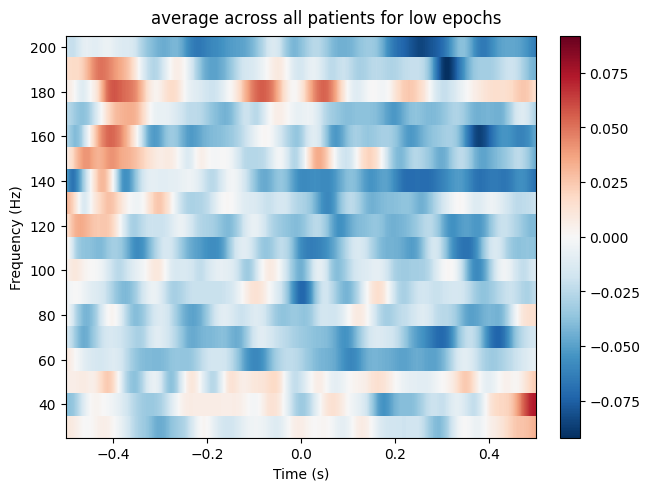

In [7]:
#see time-frequency plots
frequencies = np.arange(30, 201, 10)
n_cycles = frequencies / 5


baseline_powers = {}
for patient_id, epoch_file in low_epochs_files.items():
    epochs = mne.read_epochs(epoch_file, preload=True)
    power, itc = epochs.compute_tfr(
        method="morlet", 
        freqs=frequencies, 
        n_cycles=n_cycles, 
        decim=1, 
        return_itc=True,
        average=True
    )
    power.apply_baseline((-0.7, -0.5), mode = 'logratio' )

    #average across channels 
    avg_data = np.mean(power.data, axis=0, keepdims=True)  # shape: (1, freqs, times)
    power._data = avg_data
    power.pick_channels([power.ch_names[0]]) #drop the channels
    baseline_powers[patient_id] = power


print(len(baseline_powers))


summed_power = None
for power in baseline_powers.values():
    if summed_power is None:
        summed_power = power
    else:
        summed_power = summed_power.__add__(power)


summed_power._data /= len(baseline_powers)



fig = summed_power.plot(
    tmin = -0.5,
    tmax = 0.5,
    baseline = None,
    mode = 'mean',
    title = f'average across all patients for low epochs',
    show = True
)






Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1L_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1R_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1L_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1R_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2L_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2R_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2L_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2R_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient6_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient8_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient6_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient8_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient10_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part1_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New co

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient10_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part1_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part2_high_SWR_epochs.fif) does not conform to MNE naming conven

Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient13_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_left_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. N

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient13_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_left_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part2_left_high_SWR_epochs.fif) does not conform to MNE nam

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient16_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient17_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation ma

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient16_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient17_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient21_high_SWR_epochs.fif) does not conform to MNE naming conventions. All e

Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient22_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient23_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient22_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient23_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient25_high_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1L_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:8: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient25_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1L_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1R_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2L_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part1R_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2L_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2R_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient6_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient5_part2R_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient6_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient8_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient10_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient8_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient10_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part1_low_SWR_epochs.fif) does not conform to MNE naming conventions. 

Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part2_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient13_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient11_part2_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient13_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_left_low_SWR_epochs.fif) does not conform to MNE naming c

Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_right_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part2_right_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy 

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part1_right_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient14_part2_right_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient16_low_SWR_epochs.fif) does not conform to MNE n

Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient21_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient22_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient21_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient22_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient23_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient25_low_SWR_epochs.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
23 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code shoul

/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient23_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)
/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_65432/551490870.py:30: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/new_eeg_epochs/Patient25_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True)


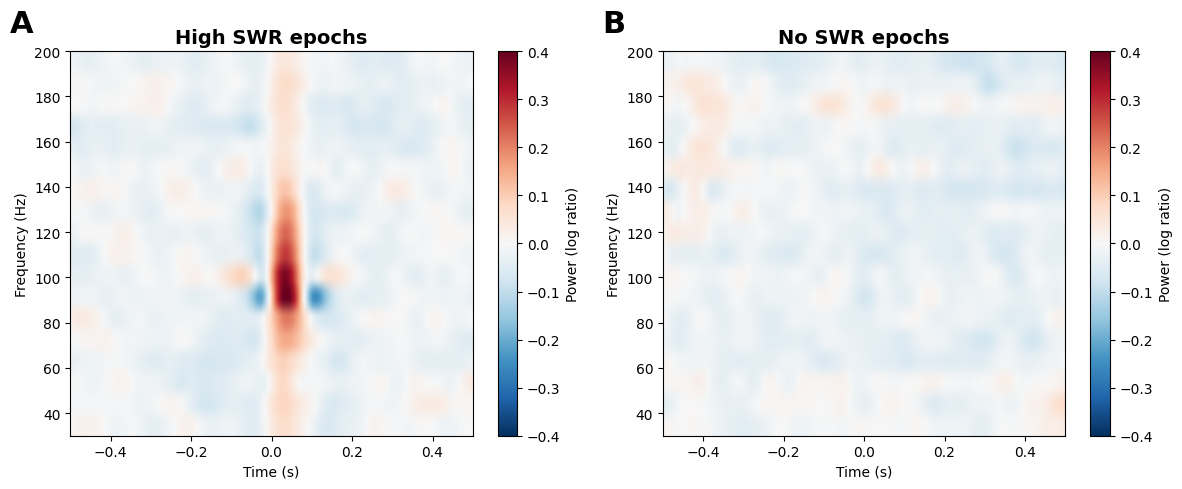

In [22]:
#new pretty plots
frequencies = np.arange(30, 201, 10)
n_cycles = frequencies / 5

# --- HIGH SWR DATA ---
baseline_powers_high = {}
for patient_id, epoch_file in high_epochs_files.items():
    epochs = mne.read_epochs(epoch_file, preload=True)
    power, itc = epochs.compute_tfr(method="morlet", freqs=frequencies, n_cycles=n_cycles, decim=1, return_itc=True, average=True)
    power.apply_baseline((-0.7, -0.5), mode='logratio')
    avg_data = np.mean(power.data, axis=0, keepdims=True)
    power._data = avg_data
    power.pick_channels([power.ch_names[0]])
    baseline_powers_high[patient_id] = power

summed_power_high = None
for power in baseline_powers_high.values():
    if summed_power_high is None:
        summed_power_high = power
    else:
        summed_power_high = summed_power_high.__add__(power)

summed_power_high._data /= len(baseline_powers_high)
ripple_band = (frequencies >= 80) & (frequencies <= 150)
avg_ripple_power_high = np.mean(summed_power_high.data[0][ripple_band], axis=0)

# --- LOW SWR DATA ---
baseline_powers_low = {}
for patient_id, epoch_file in low_epochs_files.items():
    epochs = mne.read_epochs(epoch_file, preload=True)
    power, itc = epochs.compute_tfr(method="morlet", freqs=frequencies, n_cycles=n_cycles, decim=1, return_itc=True, average=True)
    power.apply_baseline((-0.7, -0.5), mode='logratio')
    avg_data = np.mean(power.data, axis=0, keepdims=True)
    power._data = avg_data
    power.pick_channels([power.ch_names[0]])
    baseline_powers_low[patient_id] = power

summed_power_low = None
for power in baseline_powers_low.values():
    if summed_power_low is None:
        summed_power_low = power
    else:
        summed_power_low = summed_power_low.__add__(power)

summed_power_low._data /= len(baseline_powers_low)
avg_ripple_power_low = np.mean(summed_power_low.data[0][ripple_band], axis=0)

# --- COMBINED PLOT ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# A: High SWR time-frequency
im0 = axs[0].imshow(summed_power_high.data[0], aspect='auto', origin='lower', cmap='RdBu_r',
                      extent=[summed_power_high.times[0], summed_power_high.times[-1], frequencies[0], frequencies[-1]],
                      vmin=-0.4, vmax=0.4)
axs[0].set_title('High SWR epochs', fontsize=14, fontweight='bold')
axs[0].text(-0.15, 1.05, 'A', transform=axs[0].transAxes, fontsize=22, fontweight='bold')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_xlim(-0.5, 0.5)
fig.colorbar(im0, ax=axs[0], label='Power (log ratio)')

# B: Ripple power - High
#axs[0, 1].plot(summed_power_high.times, avg_ripple_power_high)
#axs[0, 1].axvline(0, color='black', linestyle='--')
#axs[0, 1].set_title('Ripple-band power - High', fontsize=12, fontweight='bold')
#axs[0, 1].text(-0.15, 1.05, 'B', transform=axs[0, 1].transAxes, fontsize=12, fontweight='bold')
#axs[0, 1].set_xlabel('Time (s)')
#axs[0, 1].set_ylabel('Power (log ratio)')
##axs[0, 1].set_xlim(-0.5, 0.5)

# C: Low SWR time-frequency
im2 = axs[1].imshow(summed_power_low.data[0], aspect='auto', origin='lower', cmap='RdBu_r',
                      extent=[summed_power_high.times[0], summed_power_high.times[-1], frequencies[0], frequencies[-1]],
                      vmin=-0.4, vmax=0.4)
axs[1].set_title('No SWR epochs', fontsize=14, fontweight='bold')
axs[1].text(-0.15, 1.05, 'B', transform=axs[1].transAxes, fontsize=22, fontweight='bold')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlim(-0.5, 0.5)
fig.colorbar(im2, ax=axs[1], label='Power (log ratio)')

# D: Ripple power - Low
#axs[1, 1].plot(summed_power_low.times, avg_ripple_power_low)
#axs[1, 1].axvline(0, color='black', linestyle='--')
#axs[1, 1].set_title('Ripple-band power - Low', fontsize=12, fontweight='bold')
#axs[1, 1].text(-0.15, 1.05, 'D', transform=axs[1, 1].transAxes, fontsize=12, fontweight='bold')
#axs[1, 1].set_xlabel('Time (s)')
#axs[1, 1].set_ylabel('Power (log ratio)')
#axs[1, 1].set_xlim(-0.5, 0.5)

plt.tight_layout()
plt.show()

Processing patient_05_part1L...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part1L_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.0s


Applying baseline correction (mode: logratio)
Processing patient_05_part1R...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part1R_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.9s


Applying baseline correction (mode: logratio)
Processing patient_05_part2L...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part2L_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.0s


Applying baseline correction (mode: logratio)
Processing patient_05_part2R...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part2R_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    6.0s


Applying baseline correction (mode: logratio)
Processing patient_06...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient6_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.4s


Applying baseline correction (mode: logratio)
Processing patient_08...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient8_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    6.5s


Applying baseline correction (mode: logratio)
Processing patient_10...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient10_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.5s


Applying baseline correction (mode: logratio)
Processing patient_11_part1...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient11_part1_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/mne/time_frequency/tfr.py:728: RuntimeWarning: invalid value encountered in divide
  plf += tfr / tfr_abs  # phase
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.7s


Applying baseline correction (mode: logratio)
⚠️ Skipping patient_11_part1 — TFR data is all NaNs
Processing patient_11_part2...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient11_part2_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.7s


Applying baseline correction (mode: logratio)
Processing patient_13...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient13_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.9s


Applying baseline correction (mode: logratio)
Processing patient_14_part1_left...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part1_left_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    6.6s


Applying baseline correction (mode: logratio)
Processing patient_14_part2_left...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part2_left_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    6.0s


Applying baseline correction (mode: logratio)
Processing patient_14_part1_right...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part1_right_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.8s


Applying baseline correction (mode: logratio)
Processing patient_14_part2_right...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part2_right_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.1s


Applying baseline correction (mode: logratio)
Processing patient_16...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient16_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.1s


Applying baseline correction (mode: logratio)
Processing patient_17...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient17_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.6s


Applying baseline correction (mode: logratio)
Processing patient_21...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient21_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.6s


Applying baseline correction (mode: logratio)
Processing patient_22...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient22_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.0s


Applying baseline correction (mode: logratio)
Processing patient_23...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient23_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    6.4s


Applying baseline correction (mode: logratio)
Processing patient_25...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/2153679605.py:15: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient25_mag_high_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.4s


Applying baseline correction (mode: logratio)

✅ Processed 19 patients with valid data.
No baseline correction applied


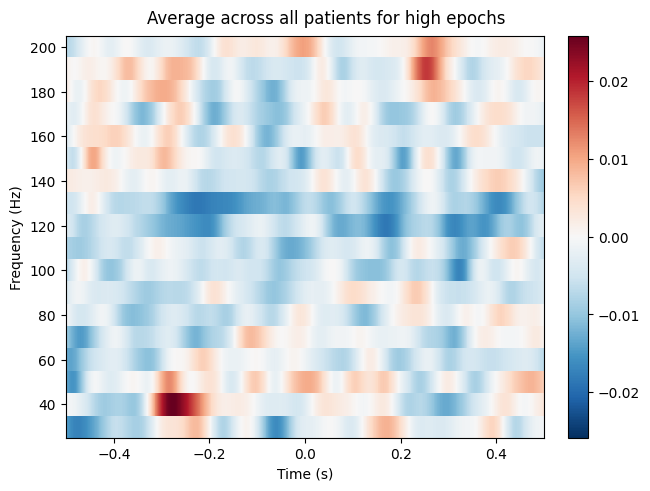

In [19]:
#MEG time_frequency plots


# Frequency range and cycles for Morlet wavelets
frequencies = np.arange(30, 201, 10)
n_cycles = frequencies / 5

baseline_powers = {}
valid_patient_ids = []

for patient_id, epoch_file in high_epochs_files_mag.items():
    
    # Load and pick MEG channels
    epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
    epochs.pick_types(meg=True)

    # Compute TFR (average over epochs)
    power, itc = epochs.compute_tfr(
        method="morlet", 
        freqs=frequencies, 
        n_cycles=n_cycles, 
        decim=1, 
        return_itc=True,
        average=True
    )

    # baseline correction
    power.apply_baseline((-0.7, -0.5), mode='logratio')

    
    if np.isnan(power.data).all():
        print(f"⚠️ Skipping {patient_id} — TFR data is all NaNs")
        continue

    # Average 
    avg_data = np.mean(power.data, axis=0, keepdims=True)  # shape: (1, freqs, times)

    # Create new TFR object with simplified info
    new_power = power.copy()
    new_power._data = avg_data
    new_power.info = mne.create_info(
        ch_names=['MeanChannel'],
        sfreq=power.info['sfreq'],
        ch_types='eeg'  # use 'eeg' so MNE can plot it
    )
    new_power.ch_names[0] = 'MeanChannel'

    baseline_powers[patient_id] = new_power
    valid_patient_ids.append(patient_id)




summed_power = None
for patient_id in valid_patient_ids:
    power = baseline_powers[patient_id]
    if summed_power is None:
        summed_power = power.copy()
    else:
        summed_power = summed_power.__add__(power)

# Compute average
summed_power._data /= len(valid_patient_ids)

# Plot the final result
fig = summed_power.plot(
    tmin=-0.5,
    tmax=0.5,
    baseline=None,
    mode='mean',
    title='Average across all patients for high epochs',
    show=True
)
    
    



NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part1L__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.1s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part1R__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.0s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part2L__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.1s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient5_part2R__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.8s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient6__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.5s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient8__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.9s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient10__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.9s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient11_part1__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/mne/time_frequency/tfr.py:728: RuntimeWarning: invalid value encountered in divide
  plf += tfr / tfr_abs  # phase
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.2s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient11_part2__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.0s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient13__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.6s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part1_left__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/mne/time_frequency/tfr.py:728: RuntimeWarning: invalid value encountered in divide
  plf += tfr / tfr_abs  # phase
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.8s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part2_left__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.6s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part1_right__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/mne/time_frequency/tfr.py:728: RuntimeWarning: invalid value encountered in divide
  plf += tfr / tfr_abs  # phase
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.1s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient14_part2_right__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.6s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient16__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.6s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient17__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    5.9s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient21__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.5s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient22__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.5s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient23__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.5s


Applying baseline correction (mode: logratio)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/var/folders/hp/k3clndsn2sj608qsb4fl5zvr0000gn/T/ipykernel_26121/4104007938.py:12: RuntimeWarning: This filename (/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/MEG_epochs/mag/Patient25__mag_low_SWR_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    3.6s


Applying baseline correction (mode: logratio)
No baseline correction applied


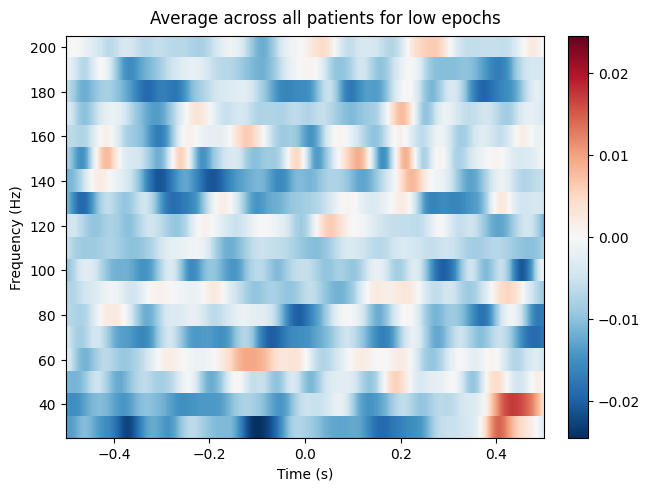

In [23]:
# Frequency range and cycles for Morlet wavelets
frequencies = np.arange(30, 201, 10)
n_cycles = frequencies / 5

baseline_powers = {}
valid_patient_ids = []

for patient_id, epoch_file in low_epochs_files_mag.items():
    

    # Load and pick MEG channels
    epochs = mne.read_epochs(epoch_file, preload=True, verbose=False)
    epochs.pick_types(meg=True)

    # Compute TFR (average over epochs)
    power, itc = epochs.compute_tfr(
        method="morlet", 
        freqs=frequencies, 
        n_cycles=n_cycles, 
        decim=1, 
        return_itc=True,
        average=True
    )

    # Apply baseline correction
    power.apply_baseline((-0.7, -0.5), mode='logratio')

    # Check if data contains only NaNs
    if np.isnan(power.data).all():
        
        continue

    # Average across channels
    avg_data = np.mean(power.data, axis=0, keepdims=True)  # shape: (1, freqs, times)

    # Create new TFR object with simplified info
    new_power = power.copy()
    new_power._data = avg_data
    new_power.info = mne.create_info(
        ch_names=['MeanChannel'],
        sfreq=power.info['sfreq'],
        ch_types='eeg' #so MNE can plot it  
    )
    new_power.ch_names[0] = 'MeanChannel'

    baseline_powers[patient_id] = new_power
    valid_patient_ids.append(patient_id)




summed_power = None
for patient_id in valid_patient_ids:
    power = baseline_powers[patient_id]
    if summed_power is None:
        summed_power = power.copy()
    else:
        summed_power = summed_power.__add__(power)

# Compute average
summed_power._data /= len(valid_patient_ids)

# Plot the final result
fig = summed_power.plot(
    tmin=-0.5,
    tmax=0.5,
    baseline=None,
    mode='mean',
    title='Average across all patients for low epochs',
    show=True
)
    
    



In [20]:
print(summed_power.data.shape)
print(np.min(summed_power.data), np.max(summed_power.data))
print(np.isnan(summed_power.data).any())
print(np.all(summed_power.data == 0))

(1, 18, 2001)
-0.305179578412227 0.14560436534962878
False
False
